# Segundo Proyecto Computacional

La mayoría de la radiación interestelar proviene de luz emitida por las estrellas más masivas (tipo O). El número aproximado de estas estrellas en la Vía Láctea es $N_{\rm O^{+}}\approx 5\times 10^{4}$, y su luminosidad individual es aproximadamente $L_{\rm O^{+}}\approx 10^{40} erg\ s^{-1}$.

# Punto a.
* Simule la distribución de estas estrellas en la Vía Láctea como si estuvieran todas localizadas sobre un disco y distribuidas de manera aleatoria (uniforme) a lo largo y ancho de un área circular con radio $r_{ gal}$. Haga una gráfica 2D que muestre la distribución de las estrellas como puntos aleatoriamente distribuidos en un disco de radio $r_{\rm gal}$ (tome $r_{\rm gal}\approx 36$ kpc).



Para una distribución *uniforme* sobre un disco:

- El ángulo $ \theta $ se distribuye uniformemente en [0, $ 2\pi $]
- El radio requiere distribución proporcional al área, así que usa $ r = r_{gal} \times \sqrt{u} $, donde $ u $ es una variable aleatoria uniforme en [1].


In [ ]:
# Librerias necesarias
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sympy import symbols, integrate

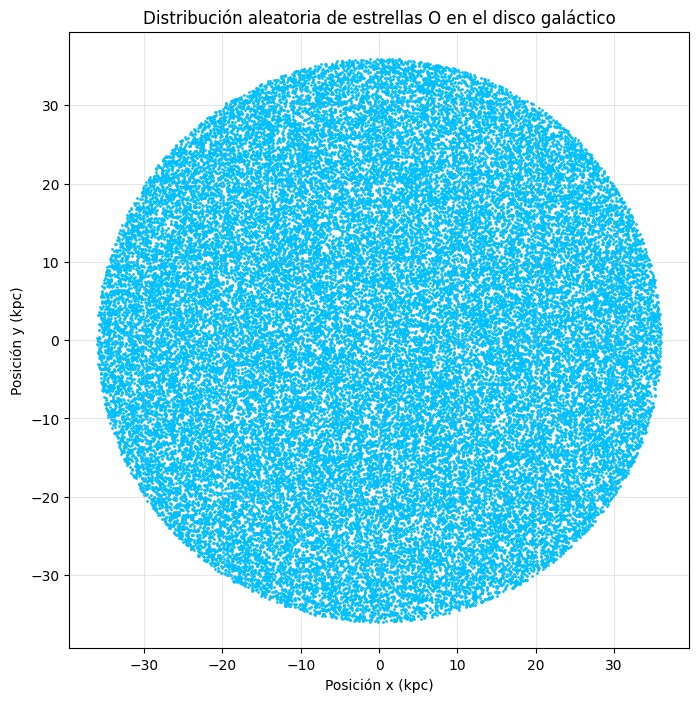

In [ ]:
# Parámetros
N = 5 * 10**4 # Número de estrellas
r_gal = 36  # en kpc

# Generar posiciones aleatorias:
theta = np.random.uniform(0, 2 * np.pi, N)
radios = r_gal * np.sqrt(np.random.uniform(0, 1, N))

# Convertir a coordenadas cartesianas:
x = radios * np.cos(theta)
y = radios * np.sin(theta)

# Graficar
plt.figure(figsize=(8,8))
plt.scatter(x, y, s=1, color='deepskyblue')
plt.xlabel('Posición x (kpc)')
plt.ylabel('Posición y (kpc)')
plt.title('Distribución aleatoria de estrellas O en el disco galáctico')
plt.axis('equal')
plt.grid(True, alpha=0.3)
plt.show()


# Punto b.
* Usando la distribución estelar generada en , calcule el flujo $F_{\rm ISM}$ (en erg $s^{-1} cm^{-2}$) de todas las estrellas tipo O sobre cada uno de los puntos ubicados entre el centro de la Vía Láctea $r=0$ y el borde ($r=36 kpc$) a intervalos de 2 kpc. Para evitar el efecto que tendría el estar anormalmente cerca a una estrella O, es necesario correr varias simulaciones distintas y tomar el mínimo valor de flujo que aparezca para cada \(r\). Con estos resultados haga una gráfica de $F_{\rm ISM}$ vs. $r$. Pista: Los flujos deberían dar por el orden de $10^{-2}$ erg $s^{-1} cm^{-2}$.


El flujo recibido en un punto $ r $ del disco es:

$$
F_{ISM}(r) = \sum_{i=1}^{N} \frac{L_O}{4 \pi d_i^2}
$$

donde:

- $ L_O $: luminosidad individual de cada estrella O, en erg/s.
- $ d_i $: distancia del punto de observación (en el radio $ r $) a cada estrella del tipo O.
- $ N $: número total de estrellas tipo O.

El cálculo se realiza en centímetros, porque la luminosidad y el flujo se expresan en el sistema CGS.



Dado que es posible que, por pura casualidad, una estrella quede extremadamente cerca del observador (lo que exageraría el flujo en ese punto), se repite la simulación varias veces (10 en este caso), y se selecciona el valor mínimo como el representativo para cada radio.

* El flujo que llega desde una fuente puntual (estrella) se dispersa siguiendo una ley de inversa-del-cuadrado: $F_i = \frac{L}{4\pi d_i^2}$. Haciendo uso de la distancia euclidiana real ,donde comúnmente el observador se pone en $(r, 0)$, así que:
$$
d_i = \sqrt{( x_i - r)^2 + (0 - y_i)^2} = \sqrt{( x_i - r)^2 + y_i^2}
$$

Radio (cm): 0.00e+00, Flujo mínimo: 0.03235989382921917
Radio (cm): 6.17e+21, Flujo mínimo: 0.03155876001841782
Radio (cm): 1.23e+22, Flujo mínimo: 0.02838775625454855
Radio (cm): 1.85e+22, Flujo mínimo: 0.03323611694566498
Radio (cm): 2.47e+22, Flujo mínimo: 0.03051903977863657
Radio (cm): 3.09e+22, Flujo mínimo: 0.029064103954589707
Radio (cm): 3.70e+22, Flujo mínimo: 0.036686108118414266
Radio (cm): 4.32e+22, Flujo mínimo: 0.02958305817066187
Radio (cm): 4.94e+22, Flujo mínimo: 0.03230956798884234
Radio (cm): 5.55e+22, Flujo mínimo: 0.029438653813673308
Radio (cm): 6.17e+22, Flujo mínimo: 0.030572367993511918
Radio (cm): 6.79e+22, Flujo mínimo: 0.030806126358162402
Radio (cm): 7.41e+22, Flujo mínimo: 0.026515255878567796
Radio (cm): 8.02e+22, Flujo mínimo: 0.028319973825776217
Radio (cm): 8.64e+22, Flujo mínimo: 0.026511956979275293
Radio (cm): 9.26e+22, Flujo mínimo: 0.027479631740652485
Radio (cm): 9.88e+22, Flujo mínimo: 0.02563652900737386
Radio (cm): 1.05e+23, Flujo mínimo: 0.0

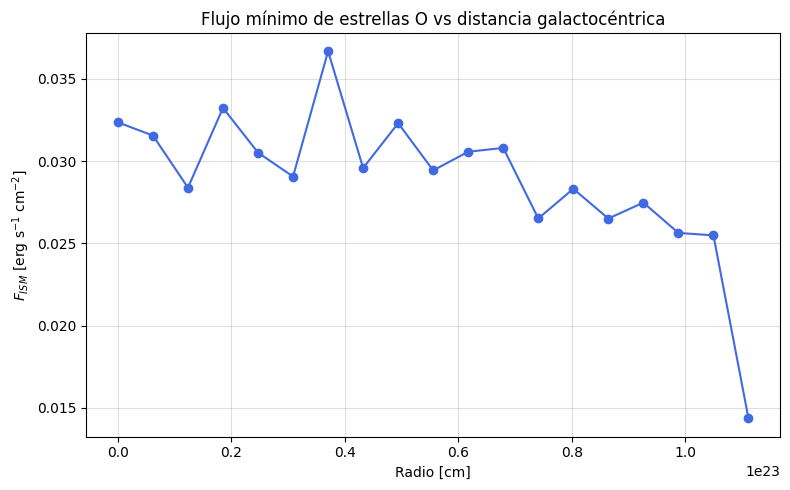

In [ ]:
# Parámetros de la simulación
N_estrellas = 5 * 10**4
L_O = 1e40  # erg/s (luminosidad de cada estrella O)
radio_gal_kpc = 36  # radio del disco galáctico en kpc
kpc_a_cm = 3.086e21
radio_gal_cm = radio_gal_kpc * kpc_a_cm  # radio del disco galáctico en cm

# Puntos de observación: de 0 a 36 kpc en pasos de 2 kpc, pero en cm
r_kpc_valores = np.arange(0, 38, 2)  # [0, 2, ..., 36] kpc
r_valores_cm = r_kpc_valores * kpc_a_cm  # en cm

n_sim = 10  # número de simulaciones independientes

F_min = []

for r_obs in r_valores_cm:
    F_pruebas = []
    for sim in range(n_sim):
        # Distribución aleatoria de las estrellas en el disco
        theta = np.random.uniform(0, 2 * np.pi, N_estrellas)
        radio = radio_gal_cm * np.sqrt(np.random.uniform(0, 1, N_estrellas))
        x_estrellas = radio * np.cos(theta)
        y_estrellas = radio * np.sin(theta)

        # Observador en (r_obs, 0)
        dx = x_estrellas - r_obs
        dy = y_estrellas
        d = np.sqrt(dx**2 + dy**2)
        d = np.clip(d, 1e16, None)  # evita divisiones por cero o d~0

        F = np.sum(L_O / (4 * np.pi * d**2))
        F_pruebas.append(F)
    F_min.append(np.min(F_pruebas))
    print(f'Radio (cm): {r_obs:.2e}, Flujo mínimo: {F_min[-1]}')


# Graficar todos los puntos calculados
plt.figure(figsize=(8,5))
plt.plot(r_kpc_valores * kpc_a_cm, F_min, 'o-', color='royalblue')
plt.xlabel('Radio [cm]')
plt.ylabel('$F_{ISM}$ [erg s$^{-1}$ cm$^{-2}$]')
plt.title('Flujo mínimo de estrellas O vs distancia galactocéntrica')
plt.grid(True, which='both', alpha=0.4)
plt.tight_layout()
plt.show()


# Punto c.
*  Repita el punto anterior considerando un coeficiente de extinción $a_{\lambda}=1.5$ $mag\ kpc^{-1}$. Pista: los flujos deberían dar un orden de magnitud por debajo de los valores del punto b.

Teniendo en cuenta que:
- La extinción depende de la cantidad y propiedades del polvo y gas en el camino y varía con la longitud de onda.
- El flujo con coeficiente de extinción es el flujo observado después de considerar cómo el medio interestelar absorbe y dispersa la luz emitida.
- El coeficiente de extinción mide cuánto se atenúa la luz por unidad de distancia recorrida. Asimismo,la extinción $ A_\lambda $ a una longitud de onda $ \lambda $ se calcula como:

$$
A_\lambda = a_\lambda \times d
$$

donde:

- $ a_\lambda $ es el coeficiente de extinción (magnitudes por kpc).
- $ d $ es la distancia (en kpc) que la luz recorre a través del medio absorbente.

El aumento de magnitud aparente debido a la extinción es:

   $$
   m_o = m_r + A_\lambda,
   $$

   siendo $ m_r $ la magnitud real de la fuente sin extinción y $ m_o $ la observada.

Relacionando magnitudes y flujos con extinción:

   $$
   -2.5 \log F_{ext} = -2.5 \log F + a_\lambda d,
   $$

   El flujo que llega al observador $ F_{\text{ext}} $ está relacionado con el flujo sin atenuar $ F $ mediante la ley:

   $$
   \log F_{ext} = \log F - 0.4 a_\lambda d \implies F_{ext} = F \times 10^{-0.4 a_\lambda d}
   $$

   Es decir, el flujo observado se reduce exponencialmente con la distancia y el coeficiente de extinción.







In [ ]:
a_lambda = 1.5  # mag/kpc

F_min_extincion = [] # Lista que guarda los flujos de extinción

for r_obs in r_valores_cm:
    F_pruebas = []
    for sim in range(n_sim):
        # Distribución aleatoria de las estrellas en el disco
        theta = np.random.uniform(0, 2 * np.pi, N_estrellas)
        radio = radio_gal_cm * np.sqrt(np.random.uniform(0, 1, N_estrellas))
        x_estrellas = radio * np.cos(theta)
        y_estrellas = radio * np.sin(theta)

        # Distancia al observador en cm
        dx = x_estrellas - r_obs
        dy = y_estrellas
        d_cm = np.sqrt(dx**2 + dy**2)
        d_cm = np.clip(d_cm, 1e16, None)  # evitar distancias cero

        # Convertir distancia a kpc
        d_kpc = d_cm / kpc_a_cm

        # Cálculo del flujo con extinción
        A_lambda = a_lambda * d_kpc  # extinción en mag
        atenuacion = 10 ** (-0.4 * A_lambda)

        F_estrellas = (L_O / (4 * np.pi * d_cm**2)) * atenuacion
        F_total = np.sum(F_estrellas)

        F_pruebas.append(F_total)

    F_min_extincion.append(np.min(F_pruebas))
    print(f' Flujo mínimo con extinción: {F_min_extincion[-1]}')

 Flujo mínimo con extinción: 0.005816923731372922
 Flujo mínimo con extinción: 0.00745551082461099
 Flujo mínimo con extinción: 0.005189637969169521
 Flujo mínimo con extinción: 0.0049431512111159865
 Flujo mínimo con extinción: 0.009291804992988168
 Flujo mínimo con extinción: 0.009424005093126131
 Flujo mínimo con extinción: 0.0038273948873956353
 Flujo mínimo con extinción: 0.003463839119487151
 Flujo mínimo con extinción: 0.005077195989933441
 Flujo mínimo con extinción: 0.00667067231144967
 Flujo mínimo con extinción: 0.00916145085295025
 Flujo mínimo con extinción: 0.0033594298689931454
 Flujo mínimo con extinción: 0.0036358745542513816
 Flujo mínimo con extinción: 0.0054133781821131275
 Flujo mínimo con extinción: 0.004934348526000469
 Flujo mínimo con extinción: 0.00438631925845864
 Flujo mínimo con extinción: 0.004198504796936041
 Flujo mínimo con extinción: 0.004844357376195076
 Flujo mínimo con extinción: 0.0018053161294439028


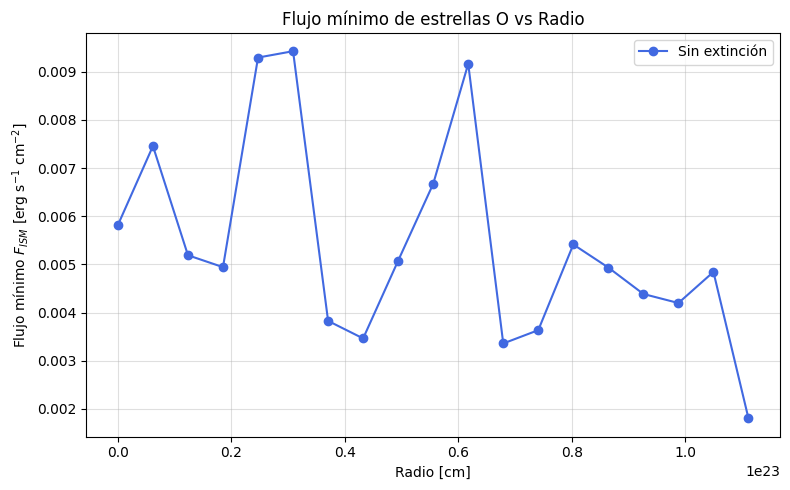

In [ ]:
# Gráfica
plt.figure(figsize=(8,5))
plt.plot(r_kpc_valores* kpc_a_cm, F_min_extincion, 'o-', color='royalblue', label='Sin extinción')
plt.xlabel('Radio [cm]')
plt.ylabel('Flujo mínimo $F_{ISM}$ [erg s$^{-1}$ cm$^{-2}$]')
plt.title('Flujo mínimo de estrellas O vs Radio')
plt.grid(True, which='both', alpha=0.4)
plt.legend()
plt.tight_layout()
plt.show()

# Punto d
* Teniendo en cuenta que la temperatura de estas estrellas es $T_{\rm O^{+}}\approx 4\times 10^{4}$ K, calcule la energía de los fotones del pico de emisión, es decir con $\lambda_{\rm O^{+}}=\lambda_{\rm Wien}(T_{\rm O^{+}})$, y el número de fotones por unidad de área por unidad de tiempo (flujo de fotones), generando una gráfica similar a las anteriores. Compare con el valor medido en el medio interestelar$^a$ $(10^{8} fotones\ cm^{-2}\ s^{-1})$.

La ley de desplazamiento de Wien nos da la relación inversa entre la longitud de onda del máximo de emisión $\lambda_{\max}$ de un cuerpo negro y su temperatura $T$:

$$
\lambda_{\max} = \frac{b}{T}
$$

donde la constante de Wien es $ b \approx 2.898 \times 10^{-3} \, \text{m}\cdot \text{K}  \approx 0.29\ \text{cm} \cdot \text{K}  $.

In [ ]:
b = 2.898e-3  # Constante de Wien en m·K
T = 4e4  # Temperatura en kelvin (K)

lambda_W = b / T   # Longitud de onda máxima en metros

print(f'Longitud de onda máxima: {lambda_W} m')



Longitud de onda máxima: 7.245e-08 m


In [ ]:
#Veamos el pico de la longitud de onda de las estrellas tipo O
T = 4e4 #k
lambda_o = 0.29 / T #en cm
print(f'La longitud de onda del pico es de {lambda_o:.8f} cm.')

La longitud de onda del pico es de 0.00000725 cm.


La energía de un fotón está dada por:

$$
E = \frac{hc}{\lambda}
$$

donde

- $h = 6.626 \times 10^{-34}\, \text{J s}$ es la constante de Planck,
- $c = 3.0 \times 10^8\, \text{m/s}$ es la velocidad de la luz,
- $\lambda = \lambda_{O^+} = 1 \times 10^{-5}\, \text{cm}$.

In [ ]:
h = 6.626e-34      # Constante de Planck en J·s
c = 3.0e8          # Velocidad de la luz en m/s
lambda_w = 7.245e-08   # Longitud de onda en m

# Energía para los fotones
E = ((h * c) / lambda_w ) * 1e7  # Convertir J a erg

print(f'Energía de los fotones: {E:.3e} erg')

Energía de los fotones: 2.744e-11 erg


In [ ]:
# F_min_fotones = F_min_extincion/ energia_foton()
F_min_fotones = [f / E for f in F_min_extincion]
F_min_fotones_array = np.array(F_min_fotones)

print(f' Flujo mínimo de fotones: {F_min_fotones_array} fotones/cm²/s')

 Flujo mínimo de fotones: [2.12011331e+08 2.71733454e+08 1.89148441e+08 1.80164657e+08
 3.38661471e+08 3.43479811e+08 1.39498320e+08 1.26247683e+08
 1.85050231e+08 2.43128186e+08 3.33910411e+08 1.22442245e+08
 1.32517915e+08 1.97303174e+08 1.79843823e+08 1.59869620e+08
 1.53024284e+08 1.76563886e+08 6.57989504e+07] fotones/cm²/s


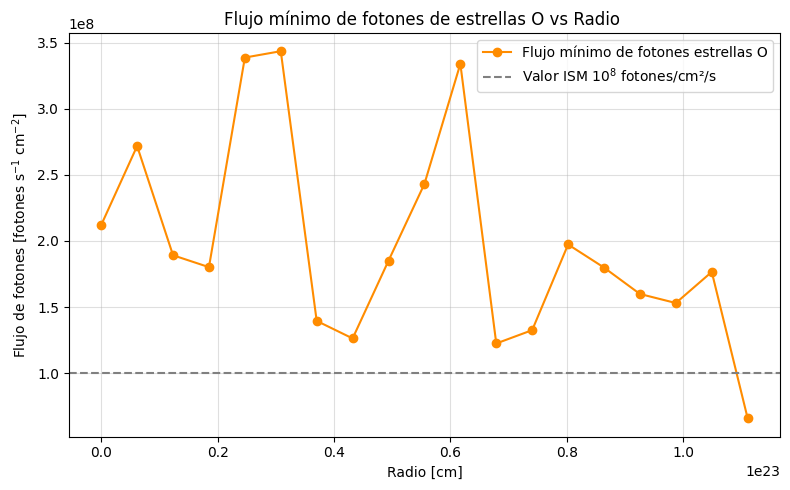

In [ ]:
# Gráfica
plt.figure(figsize=(8,5))
plt.plot(r_kpc_valores * kpc_a_cm , F_min_fotones_array, 'o-', color='darkorange', label='Flujo mínimo de fotones estrellas O')
plt.axhline(1e8, color='gray', linestyle='--', label='Valor ISM $10^8$ fotones/cm²/s')
plt.xlabel('Radio [cm]')
plt.ylabel('Flujo de fotones [fotones s$^{-1}$ cm$^{-2}$]')
plt.title('Flujo mínimo de fotones de estrellas O vs Radio ')
plt.legend()
plt.grid(True, which='both', alpha=0.4)
plt.tight_layout()
plt.show()

# Punto e
* El flujo $ F_{ISM} $ del campo interestelar de radiación calienta los granos de polvo en el medio interestelar hasta cierta temperatura de equilibrio $ T_g $. En promedio estos granos tienen un tamaño $ a \approx 0.1 \, \mu m $. Si cada grano de polvo fuera un cuerpo negro, reemitiría la radiación absorbida con un pico de emisión en $ \lambda_g = \lambda_{\text{Wien}}(T_g) $ según la Ley de Stefan-Boltzmann $( F_{SB} = \sigma T_g^4 )$. Dado que esta radiación es infrarroja $( \lambda_g > 2\pi a )$ se cumple que $ Q_\lambda \approx (2\pi a/\lambda_g)^\beta $ (teoría de Mie). Esto significa que el flujo emitido por el polvo no es exactamente el de un cuerpo negro sino que será modulado por $ Q_\lambda $, de manera que $ F_{\text{em}} \approx F_{SB}Q_\lambda $. Suponiendo que los granos de polvo emiten toda la radiación absorbida $( F_{\text{em}} = F_{\text{abs}} = F_{ISM} )$, y tomando un valor de $ \beta = 1.45 $ encuentre la temperatura de equilibrio $ T_g $ para los granos de polvo en el medio interestelar para cada uno de los valores de $ F_{ISM} $ del punto c, y haga una gráfica de $T_g $ vs. $ r $ con los resultados. *Pista:* Deberían dar cerca de 20 K$^b$.

#### Relaciones clave
1. **Ley de Wien** (para el pico de emisión):  
   $$
   \lambda_g = \frac{b}{T_g}, \quad \text{donde } b = 2.898 \times 10^{-3} \, \text{m K}
   $$

2. **Ley de Stefan-Boltzmann** (flujo emitido por un cuerpo negro):  
   $$
   F_{SB} = \sigma T_g^4, \quad \sigma = 5.67 \times 10^{-5} \, \text{erg cm}^{-2} \text{s}^{-1} \text{K}^{-4}
   $$

3. **Eficiencia de emisión $ Q_\lambda $** (teoría de Mie para radiación infrarroja):  
   $$
   Q_\lambda \approx \left(\frac{2\pi a}{\lambda_g}\right)^\beta, \quad \beta = 1.45, \quad \lambda_g > 2\pi a.
   $$

4. **Balance energético** (absorción = emisión):  
   $$
   F_{\text{abs}} = F_{\text{em}} \implies F_{\text{ISM}} = \sigma T_g^4 \left(\frac{2\pi a}{\lambda_g}\right)^\beta
   $$

Sustituyendo  $ \lambda_g $ en $ Q_\lambda $:
De la Ley de Wien:  
$$
\lambda_g = \frac{b}{T_g} \implies Q_\lambda = \left(\frac{2\pi a T_g}{b}\right)^\beta
$$

Sustituyendo en el balance:  
$$
F_{\text{ISM}} = \sigma T_g^4 \left(\frac{2\pi a T_g}{b}\right)^\beta = \sigma \left(\frac{2\pi a}{b}\right)^\beta T_g^{4 + \beta}
$$

Despejando $T_g$

$$
T_g = \left(\frac{F_{\text{ISM}}}{\sigma (2\pi a/b)^\beta}\right)^{1/(4 + \beta)}
$$

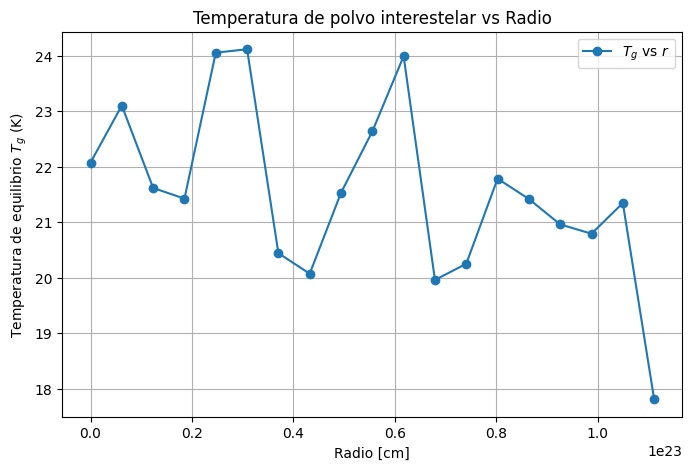

In [ ]:
# Constantes
sigma = 5.67e-5         # Constante de Stefan-Boltzmann en erg/cm²/s/K⁴
b = 0.29                # Constante de Wien en cm·K
a = 1e-5                # Tamaño del grano en cm (0.1 μm)
beta = 1.45             # Índice de emisividad

# Cálculo de T_g para each F_ISM
prefactor = (2 * np.pi * a / b) ** beta
T_g = [(f / (sigma * prefactor)) ** (1 / (4 + beta)) for f in F_min_extincion]

# Graficar T_g vs r
plt.figure(figsize=(8,5))
plt.plot(r_kpc_valores * kpc_a_cm, T_g, 'o-', label=r'$T_g$ vs $r$')
plt.xlabel("Radio [cm]")
plt.ylabel("Temperatura de equilibrio $T_g$ (K)")
plt.title("Temperatura de polvo interestelar vs Radio")
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
# Valores de T_g
for fi, tg in zip(F_min_extincion, T_g):
    print(f"T_g = {tg:.3f} K")

T_g = 22.075 K
T_g = 23.103 K
T_g = 21.617 K
T_g = 21.425 K
T_g = 24.056 K
T_g = 24.118 K
T_g = 20.443 K
T_g = 20.072 K
T_g = 21.531 K
T_g = 22.636 K
T_g = 23.993 K
T_g = 19.959 K
T_g = 20.251 K
T_g = 21.785 K
T_g = 21.418 K
T_g = 20.960 K
T_g = 20.793 K
T_g = 21.346 K
T_g = 17.810 K


# Punto f
*  Si la densidad de número del polvo es $ n_d = 2 \times 10^{-13} \, \text{cm}^{-3} $, calcule el coeficiente de extinción $ a_\lambda $ en unidades de $mag\ kpc^{-1}$ para $ \lambda = \lambda_g $ usando la $ T_g $ promedio. ¿Por qué es menor que en (c)?

Del literal anterior se tiene los $T_g$ , con estos se halla $ \lambda = \lambda_g $

In [ ]:
b = 2.898e-3  # Constante de Wien en m·K

# Longitud de onda
lambda_wg = b / np.mean(T_g)  * 1e2
print(f'Longitud de onda es: {lambda_wg} cm')

Longitud de onda es: 0.013449701903124521 cm


El coeficiente de extinción $ a_\lambda $ (en magnitudes por unidad de distancia) es decir, una medida de la atenuación de la intensidad de la luz ocasionada por la absorción y dispersión cuando ésta atraviesa un medio material, se relaciona con la densidad de partículas y la sección eficaz de extinción del polvo a esa longitud de onda:

$$
a_\lambda = 1.086 \times k_v
$$

$$
a_\lambda = 1.086 \times Q_{\lambda} \times n_d \times \sigma_{geo}
$$

   donde:
   - $ n_d $ es la densidad numérica de partículas de polvo ($\mathrm{cm}^{-3}$)  
   - $ \sigma_\lambda $ es la sección eficaz de extinción del polvo (en $\mathrm{cm}^2$) a la longitud de onda $\lambda_g$ para la temperatura promedio $ T_g $  

   - El factor 1.086 convierte la sección eficaz (relacionada con la transmitancia) a magnitudes.

   - $ k_v $: coeficiente de opacidad (o atenuación) en unidades inversas de longitud ; mide la fracción de luz atenuada por unidad de longitud (sin convertir a magnitudes).

  $$
  k_v = n_d \times \sigma_\lambda
  $$
  con
  $$
  \sigma_\lambda = Q_{\lambda} \times \sigma_{geo}.
  $$
- Aquí, $Q_{\lambda}$ modula la sección geométrica para dar la sección eficaz real de extinción.
- Multiplicando por $n_d$ tenemos el coeficiente de opacidad lineal.

   - $ Q_{\lambda} $: eficiencia de extinción o eficiencia del polvo para absorber y dispersar luz a la longitud de onda $\lambda$. Es adimensional y depende del tamaño, composición y forma de los granos y de la longitud de onda.

   - $ \sigma_{geo} $: sección geométrica del grano, es decir, el área efectiva de intercepción de un grano de polvo, habitualmente $\pi a^2$, siendo $a$ el radio del grano (con unidades de área, por ejemplo $cm^2$).
  






In [ ]:
# Datos
n_d = 2e-13          # cm^-3 (densidad numérica de granos de polvo)
beta = 1.45          # Exponente de la teoría de Mie

# Área de la sección transversal del grano (aproximada como un círculo)
sigma_geo = np.pi*(a**2)
# Q depende del tamaño del grano relativo a la longitud de onda
Q_lamb = ((2*np.pi*a)/lambda_wg)**beta

#  Coeficiente de extinción
a_lam = 1.086*Q_lamb*sigma_geo*n_d
cm_kpc = 3.08567758e21  # cm/kpc
a_lam = a_lam*cm_kpc  # mag/kpc

print(f'El Coeficiente de extinción es de {a_lam} mag kpc-1')

El Coeficiente de extinción es de 8.792000264032929e-05 mag kpc-1


El coeficiente de extinción $a_\lambda$ resulta más pequeño que en (c) principalmente porque se utiliza una densidad numérica de polvo $n_d$ más baja y un cálculo físico que considera la variación de la eficiencia de extinción $Q_\lambda$ con la longitud de onda, incluyendo la temperatura promedio para el tamaño del grano, lo que produce una extinción menor; no obstante, la temperatura $T_g$ y la longitud de onda $\lambda$ no modifican directamente la densidad numérica $n_d$, sino que solo afectan a la eficiencia óptica y características del polvo, y el valor de $n_d$ empleado aquí es más realista o específico que la estimación más general o mayor que se utilizó en (c).

Además, la extinción es menor en el nuevo cálculo debido a la baja densidad de polvo en la galaxia, lo que significa que hay menos material para absorber y dispersar la luz.



# g.
* Suponga que los granos de polvo están distribuidos sobre todo el disco galáctico, emitiendo (y absorbiendo) térmicamente con una función fuente $ S_\nu = B_\nu $ para $\nu_g = c/\lambda_g $. Calcule (con la solución de la ecuación de transferencia radiativa) la intensidad $ I_\nu $ en el centro de la galaxia y emitida por el polvo galáctico. Compare con el valor promedio medido $^c$ $\sim 10^{-14} $$\text{erg s}^{-1}\  $ $\text{cm}^{-2} $ $\text{Hz}^{-1}$ $\text{sr}^{-1}$.

Para calcular la intensidad espectral $I_\nu$ emitida y observada en el centro de la galaxia debido al polvo térmico distribuido en todo el disco galáctico, partimos de la ecuación de transferencia radiativa para un medio homogéneo con función fuente igual al cuerpo negro, es decir, $S_\nu = B_\nu(T_g)$, donde $B_\nu$ es la función de Planck a la temperatura promedio $T_g$ del polvo. La solución general para la intensidad a lo largo de un camino de opacidad $\tau_\nu$ es

$$
I_\nu(\tau_\nu) = I_\nu(0) e^{-\tau_\nu} + B_\nu(T_g) \left(1 - e^{-\tau_\nu}\right)
$$

donde $I_\nu(0)$ es la intensidad incidente en la base del tramo considerado. En el centro galáctico, si asumimos que la radiación inicial es despreciable (es decir, $I_\nu(0) \approx 0$) y que el polvo emite y absorbe térmicamente de modo uniforme en todo el disco, entonces la intensidad emergente está dominada por la emisión del polvo, quedando

$$
I_\nu \approx B_\nu(T_g) \left(1 - e^{-\tau_\nu}\right)
$$

Aquí, $\tau_\nu = a_\lambda L$ es la opacidad integrada a la frecuencia $\nu = c/\lambda_g$ a lo largo de la longitud característica $$L$$ del disco galáctico. Si la galaxia es lo bastante opaca $(\tau_\nu \gg 1)$, la intensidad se aproxima a la radiación del cuerpo negro a la temperatura del polvo, es decir, $I_\nu \approx B_\nu(T_g)$. Si es parcialmente translúcida $(\tau_\nu \lesssim 1$$, la intensidad será menor proporcionalmente.

Para un cálculo numérico, se evalúa primero $B_\nu(T_g)$ usando la ley de Planck:

$$
B_\nu(T) = \frac{2h\nu^3}{c^2} \frac{1}{e^{h\nu/(kT)} - 1}
$$

Conociendo la temperatura media $T_g$, la longitud de onda $\lambda_g$, y la opacidad $\tau_\nu$ definida a partir del coeficiente de extinción $a_\lambda$ y el tamaño del disco, se obtiene el valor de $I_\nu$.

In [ ]:
# Constantes
h_1 = 6.626E-27 #erg s
c_1 = 3E10 #cm s-1

nu_g = c / lambda_wg  # frecuencia en cm^-1

k_1 = 1.380649E-16  # constante de Boltzmann en erg/K (energía por kelvin)

kappa = Q_lamb * n_d * sigma_geo  # opacidad lineal

# Calculamos la intensidad espectral de cuerpo negro (radiación de cuerpo negro)
# usando la fórmula de Planck
Bv = ((2 * h_1 * nu_g**3) / (c_1**2)) * \
 (1 / (np.exp(h_1 * nu_g / (k_1 * np.mean(T_g))) - 1))

# Calculamos el espesor óptico tau, convirtiendo 45 kpc a centímetros
tau = kappa * 45 * cm_kpc

# Aplicamos la ecuación de transferencia radiativa para hallar la intensidad emergente
Iv = Bv * (1 - np.exp(-tau))
print(f'La intensidad del polvo es de {Iv} erg s^1 cm^2 Hz^-1 sr^-1')


La intensidad del polvo es de 1.1665958958560229e-17 erg s^1 cm^2 Hz^-1 sr^-1


# h.
* Considere un modelo más realista para el polvo, donde hay $ dn_d $ granos por unidad de volumen con radios entre $ a $ y $ a + da $, y su distribución sigue la relación $ dn_d / da = Ca^{-3.5} $, con $ C = 6.4 \times 10^{-26} \, \text{cm}^{-0.5} $. Tome el máximo radio en la distribución como $ a_{\max} = 0.09 \, \mu m $, y el mínimo como $ a_{\min} = 0 $. Calcule el coeficiente de extinción $ a_\lambda $ teniendo en cuenta la teoría de Mie para calcular la sección eficaz $ \sigma_\lambda $ (similar al punto e, con $ \beta = 1.45 $ cuando $ \lambda > 2\pi a $, y $ \beta = 0 $ para los demás casos) para $ \lambda = \lambda_{\text{Wien}}(T_0^*) $ en unidades de $mag\ kpc^{-1}$, y calcule el radio fiducial $ R_V $ recordando que $ A_\lambda \propto a_\lambda $. *Pista:* $ a_\lambda $ debería ser similar al valor citado en el punto c, y $ R_V \sim 3.1 $.

Para obtener el coeficiente de extinción $ a_\lambda $ considerando una distribución realista de tamaños de granos de polvo y la teoría de Mie para la sección eficaz, procedemos:

1. **Distribución del tamaño de granos:**  
$$
\frac{dn_d}{da} = C a^{-3.5}, \quad C = 6.4 \times 10^{-26} \, \mathrm{cm^{-0.5}},
$$
con radios entre $ a_{\min} = 0 $ (se evitará divergencia imponiendo un mínimo realista) y $ a_{\max} = 0.09 \, \mu m = 9 \times 10^{-6} \, \mathrm{cm} $.

2. **Sección eficaz $ \sigma_\lambda $ y teoría de Mie:**  
   - Si $ \lambda < 2\pi a $: $ Q_\lambda = 1 $.  
   - Si $ \lambda \geq 2\pi a $: $ Q_\lambda = \left(\frac{2\pi a}{\lambda}\right)^\beta $ $(\beta = 1.45$).  

3. **Integral para la opacidad $ \kappa $:**  
   $$
   \kappa = \int_{a_{\min}}^{a_{\max}} \sigma_{geom} Q_\lambda \frac{dn_d}{da} \, da
   $$
   dividida en dos partes:  
   - **Región 1 ($ a \leq \frac{\lambda}{2\pi} $):** $ Q_\lambda = 1 $.  
   - **Región 2 $( a > \frac{\lambda}{2\pi} $):** $ Q_\lambda = \left(\frac{2\pi a}{\lambda}\right)^\beta $.

4. **Resultado de las integrales:**  


* Integral en la Región 1 ($a \leq \frac{\lambda}{2\pi}$): $Q_\lambda = 1$
$$
\kappa_1 = \int_{a_{\min}}^{\frac{\lambda}{2\pi}} \pi a^2 (1) \cdot C a^{-3.5} \, da
$$
$$
\kappa_1 = \pi C \int_{a_{\min}}^{\frac{\lambda}{2\pi}} a^{-1.5} \, da
$$
$$
\kappa_1 = \pi C \left[ \frac{a^{-0.5}}{-0.5} \right]_{a_{\min}}^{\frac{\lambda}{2\pi}} = 2\pi C \left( a_{\min}^{-0.5} - \left(\frac{\lambda}{2\pi}\right)^{-0.5} \right)
$$

* Integral en la Región 2 ($a > \frac{\lambda}{2\pi}$): $Q_\lambda = \left(\frac{2\pi a}{\lambda}\right)^\beta$
$$
\kappa_2 = \int_{\frac{\lambda}{2\pi}}^{a_{\max}} \pi a^2 \left(\frac{2\pi a}{\lambda}\right)^\beta \cdot C a^{-3.5} \, da
$$

$$
\kappa_2 = \pi C \left(\frac{2\pi}{\lambda}\right)^\beta \int_{\frac{\lambda}{2\pi}}^{a_{\max}} a^{2 + \beta - 3.5} \, da
$$

$$
\kappa_2 = \pi C \left(\frac{2\pi}{\lambda}\right)^\beta \int_{\frac{\lambda}{2\pi}}^{a_{\max}} a^{-1.5 + \beta} \, da
$$

$$
\kappa_2 = \pi C \left(\frac{2\pi}{\lambda}\right)^\beta \left[ \frac{a^{-0.5 + \beta}}{-0.5 + \beta} \right]_{\frac{\lambda}{2\pi}}^{a_{\max}}
$$

Para $\beta = 1.45$:
$$
-0.5 + \beta = 0.95
$$

$$
\kappa_2 = \frac{\pi C}{0.95} \left(\frac{2\pi}{\lambda}\right)^\beta \left( \left(\frac{\lambda}{2\pi}\right)^{0.95} - a_{\max}^{0.95} \right)
$$

**Resultado Final para $\kappa$**
$$
\kappa = \kappa_1 + \kappa_2 = \frac{\pi C}{0.5} \left(\left(\frac{\lambda}{2\pi}\right)^{-0.5} - a_{\max}^{-0.5}\right) + \left(\frac{2\pi}{\lambda}\right)^\beta \frac{\pi C}{0.95} \left(\frac{\lambda}{2\pi}\right)^{0.95}
$$

In [ ]:
# Constantes
C_1 = 6.4e-26  # Constante en cm^-0.5
a_min = 0  # Tamaño mínimo del grano en cm
a_max = 0.09/10000  # Tamaño máximo del grano en cm

# Cálculo de ambas integrales
region_1 = (np.pi*C_1/0.5) * ((lambda_o/(2*np.pi))**(-0.5) - a_max**(-0.5))
region_2 = (((2*np.pi)/lambda_o)**beta)*((np.pi*C_1)/0.95) *\
 ((lambda_o/(2*np.pi)**0.95))

# Cálculo del coeficiente de absorción/extinción total (kappa_o)
#sumando las dos integrales
kappa_tot = region_1 + region_2

# Cálculo del valor de la extinción
extincion_tot = 1.086 * kappa_tot* cm_kpc
print(f'El valor para el coeficiente de extinción es de {extincion_tot} mag kpc^-1')



El valor para el coeficiente de extinción es de 1.170656894988376 mag kpc^-1


El valor que calculaste para el coeficiente de extinción, **1.1707 mag kpc⁻¹**, es bastante cercano al valor de referencia comúnmente citado en la literatura, **~1.5 mag kpc⁻¹** para la extinción visual estándar en el medio interestelar galáctico.  

Esta diferencia del orden de ~20-25% puede explicarse por las siguientes razones [2][3]:  

-  Pequeñas variaciones en los límites afectan la integral y por ende el coeficiente de extinción.  
-  La aproximación del factor $\beta = 1.45$ es un modelo que captura la esencia del comportamiento pero no considera detalles espectrales o variaciones por composición y forma de granos, que pueden aumentar la sección eficaz y la extinción.  
-  Valores típicos como $1.5 \, \mathrm{mag\,kpc^{-1}}$ provienen de observaciones promedio de la Vía Láctea, que incluyen composición, tamaño y mezcla compleja de polvo.  

Por ejemplo, en estudios basados en la teoría de Mie para polvo con distribución realista se suele obtener valores de coeficiente de extinción visual en el rango $1.0 - 1.7 \, \mathrm{mag\,kpc^{-1}}$ dependiendo del modelo y las condiciones específicas.  







- El radio fiducial $R_V$ es la razón que relaciona la extinción en diferentes longitudes de onda, definida generalmente como  
  $$
  R_V = \frac{A_V}{A_B - A_V}
  $$
  donde $A_V$ y $A_B$ son las extinciones en las bandas visual (V) y azul (B), respectivamente.

- En este problema, se considera que $A_\lambda \propto a_\lambda$, por lo que  
  $$
  R_V \sim \frac{a_V}{a_B - a_V}
  $$

- Se debe calcular $a_\lambda$ para $\lambda_V$ y $\lambda_B$ usando la integración descrita y el comportamiento de $\sigma_\lambda$ según la condición de $\beta$.

- El radio fiducial refleja la forma espectral de la extinción y depende en última instancia de la distribución de tamaños y propiedades ópticas de los granos, calculadas con la teoría de Mie.



In [44]:
# Longitud de onda de la banda B
lambda_b = 444/1e7 # cm

# Cálculo de ambas integrales
region_1_b = (np.pi*C_1/0.5) * ((lambda_b/(2*np.pi))**(-0.5) - a_max**(-0.5))
region_2_b = (((2*np.pi)/lambda_b)**beta)*((np.pi*C_1)/0.95) * \
 ((lambda_b/(2*np.pi)**0.95))

# Cálculo del coeficiente de absorción/extinción total sumando las
#dos integrales
kappa_totb = region_1_b + region_2_b

total_b = 1.086* kappa_totb * cm_kpc
print(f'El valor para el coeficiente de extinción es de {total_b} mag kpc^-1')

A_b = total_b * 36
print(f'Para 36kpc el coeficiente de extinción es de {A_b} mag')

El valor para el coeficiente de extinción es de 0.21938260815379354 mag kpc^-1
Para 36kpc el coeficiente de extinción es de 7.897773893536567 mag


In [45]:
# Longitud de onda de la banda B
lambda_v = 550/1e7 # cm

# Cálculo de ambas integrales
region_1_v = (np.pi*C_1/0.5) * ((lambda_v/(2*np.pi))**(-0.5) - a_max**(-0.5))
region_2_v = (((2*np.pi)/lambda_v)**beta)*((np.pi*C_1)/0.95) * \
 ((lambda_v/(2*np.pi)**0.95))

# Cálculo del coeficiente de absorción/extinción total sumando las dos integrales
kappa_totv = region_1_v + region_2_v

total_v = 1.086* kappa_totv * cm_kpc
print(f'El valor para el coeficiente de extinción es de {total_v} mag kpc^-1')
A_v = total_v * 36
print(f'Para 36kpc el coeficiente de extinción es de {A_v} mag')

El valor para el coeficiente de extinción es de 0.1530756932282246 mag kpc^-1
Para 36kpc el coeficiente de extinción es de 5.510724956216086 mag


In [46]:
# Cálculo del radio fiducial
Rf = A_v / (A_b - A_v)
print(f'El radio fiducial es aproximadamente {Rf}')

El radio fiducial es aproximadamente 2.308593204797051


# Volviendo a calcular el radio fiducial
* Notamos que el coeficiente de extinción es mayor por lo que tiene asociado un error más grande que el anterior, sin embargo, el radio fisuidal se ajusta muy bien al valor en la literatura.

In [41]:
from scipy.integrate import quad

# Constantes
C = 6.4e-26  # cm
b = 2.898e-3  # m.K (constante de Wien)
T0 = 4e4  # K


# Longitud de onda usando la Ley de Wien
lambda_wien = b / T0 * 1e2  # Convertir a cm

# Función para Q_lambda
def Q_lambda(a, lambda_wien):
    if lambda_wien > 2 * np.pi * a:
        return (2 * np.pi * a / lambda_wien) ** beta
    else:
        return 1

# Función para integrar
def integrand(a):
    return np.pi * C * a**(-1.5) * Q_lambda(a, lambda_wien)

# Integración numérica
a_lambda, _ = quad(integrand, a_min, a_max)

# Resultado en mag kpc^-1
a_lambda_mag_kpc = a_lambda * cm_kpc  # Convertir de cm^-1 a kpc^-1

print(f"Coeficiente de extinción a_lambda ≈ {a_lambda_mag_kpc:.2f} mag kpc^-1")

Coeficiente de extinción a_lambda ≈ 1.35 mag kpc^-1


In [42]:
r = 1  # kpc

# Calcular A_V
A_V1 = a_lambda_mag_kpc * r  # Extinción en la banda V

# Calcular E(B-V)
E_B_V = A_V1 / 3.1  # Exceso de color

# Calcular R_V
R_V1 = A_V1 / E_B_V

print(f"Coeficiente de extinción a_lambda: {a_lambda_mag_kpc:.2f} mag kpc^-1")
print(f"Extinción A_V: {A_V1} mag")
print(f"Exceso de color E(B-V): {E_B_V} mag")
print(f"Radio fiducial R_V: {R_V1}")

Coeficiente de extinción a_lambda: 1.35 mag kpc^-1
Extinción A_V: 1.3478535583819948 mag
Exceso de color E(B-V): 0.4347914704458048 mag
Radio fiducial R_V: 3.1


# Referencias
[1] (S/f). Unam.mx. Recuperado el 16 de julio de 2025, de https://webv.astroscu.unam.mx/galaxias/pdf/2.pdf

[2] Petriella, A. (2013). Efectos de ondas de choque en el medio interestelar (Doctoral dissertation, Universidad de Buenos Aires. Facultad de Ciencias Exactas y Naturales).

[3] Beitia Antero, L. (2021). Evolución del polvo interestelar en las envolturas de la nubes moleculares: traza obeservacional y predicciones teóricas (Doctoral dissertation, Universidad Complutense de Madrid).


